# Basic Matplotlib Commands
In this practice we will use matplotlib library to generate graphs of linear equations and linear inequalities.


In [0]:
from IPython.display import display, Math, Latex

1. Graph the next linear functions in Python (all in the same graph):
$$𝑓_1(𝑥)=2𝑥−10$$
$$𝑓_2(𝑥)=6−𝑥$$
$$𝑓_3(𝑥)=𝑥+6$$

In [2]:
import matplotlib.pyplot as plt # canonical, tidy way
import numpy as np # we’ll use for generating data later on
import math
from matplotlib import rc
rc('text', usetex=True) # render text with latex

In [3]:
def round_up(n, decimals=0):
    multiplier = 10**decimals
    return math.ceil(n * multiplier) / multiplier


def round_down(n, decimals=0):
    multiplier = 10**decimals
    return math.floor(n * multiplier) / multiplier


def get_system_intercepts(linear_functions):
    system_intercepts = list()
    for linear_function in linear_functions:
        m = linear_function[0]
        b = linear_function[1]

        intercept = [-b / m, 0]  # intercept in y
        if intercept not in system_intercepts:
            system_intercepts.append(intercept)

        intercept = [0, b]  # intercept in x
        if intercept not in system_intercepts:
            system_intercepts.append(intercept)

        for linear_function_2 in linear_functions:
            if linear_function[0] != linear_function_2[0]:
                m_2 = linear_function_2[0]
                b_2 = linear_function_2[1]
                intercept = [
                    (b_2 - b) / (m - m_2), (b * m_2 - b_2 * m) / (m_2 - m)
                ]  # intercept between functions
                if intercept not in system_intercepts:
                    system_intercepts.append(intercept)
    return system_intercepts


def config_limits(ax, system_intercepts):
    max_x = max_y = min_x = min_y = 0
    for intercept in system_intercepts:
        if intercept[0] < min_x:
            min_x = intercept[0]
        elif intercept[0] > max_x:
            max_x = intercept[0]

        if intercept[1] < min_y:
            min_y = intercept[1]
        elif intercept[1] > max_y:
            max_y = intercept[1]

    y_margin = (max_y - min_y) * 0.15
    x_margin = (max_x - min_x) * 0.15

    sa = round_down(min_x - x_margin, -1)
    so = round_up(max_x + x_margin, -1)
    n = so - sa

    ax.set_xlim([sa, so])
    ax.set_ylim(
        [round_down(min_y - y_margin, -1),
         round_up(max_y + y_margin, -1)])

    x = np.linspace(start=sa, stop=so, num=n)
    return x

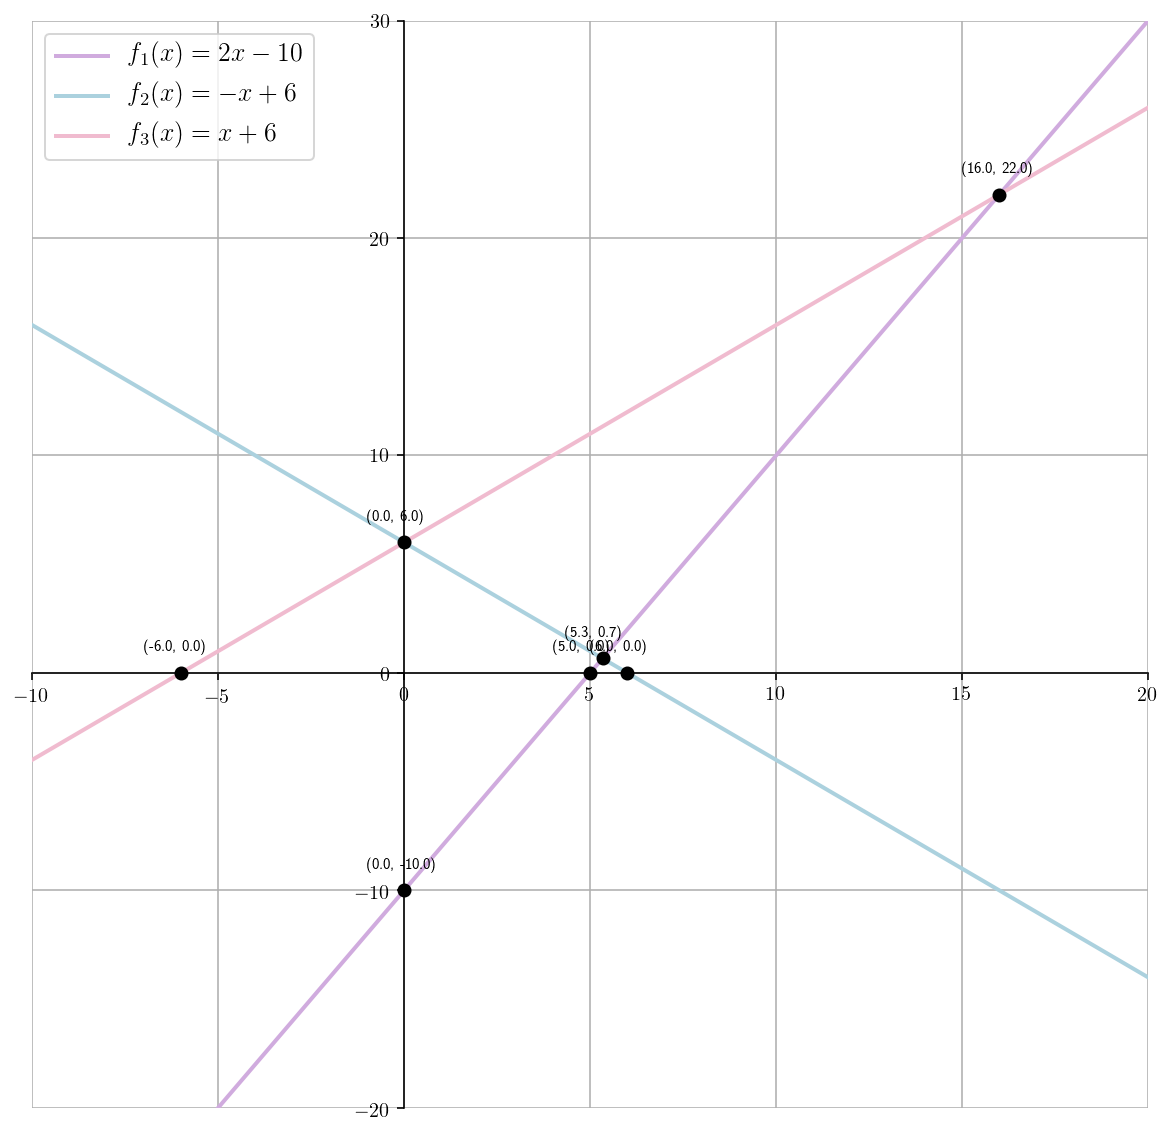

In [4]:
# axes actually translates into what we think of as an individual plot or graph
# rather than the plural of “axis,” as we might expect
fig, ax = plt.subplots(figsize=(10, 10))

# y = m * x + b, then [m, b]
linear_functions = [[2, -10], [-1, 6], [1, 6]]
system_intercepts = get_system_intercepts(linear_functions)
x = config_limits(ax, system_intercepts)

ax.spines['bottom'].set_position(('data',0)) # set position of x spine to x=0
ax.spines['left'].set_position(('data',0))   # set position of y spine to y=0
ax.spines['top'].set_color("none") #turn off
ax.spines['right'].set_color("none") #turn off

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.grid(True)

colors = ['#d0abde', '#abd1de', '#f0bbcf']
labels = ["$f_1(x)=2x-10$", "$f_2(x)=-x+6$", "$f_3(x)=x+6$"]

for i in range(0, len(linear_functions)):
    ax.plot(x, x*linear_functions[i][0]+linear_functions[i][1], colors[i], label=labels[i], linewidth=2);

ax.legend(loc=0, fontsize=13); # upper left corner

for i in range(0, len(system_intercepts)):
    ax.plot(system_intercepts[i][0], system_intercepts[i][1], 'ko')
    ax.annotate('({:.1f}, {:.1f})'.format(system_intercepts[i][0], system_intercepts[i][1]), (system_intercepts[i][0]-1, system_intercepts[i][1]+1), fontsize=7)

2. **Pizza Slice:** Graph the region that satisfies the following inequalities:
$$𝑦≥𝑓_1(𝑥)$$
$$𝑦≥𝑓_2(𝑥)$$
$$𝑦≤𝑓_3(𝑥)$$

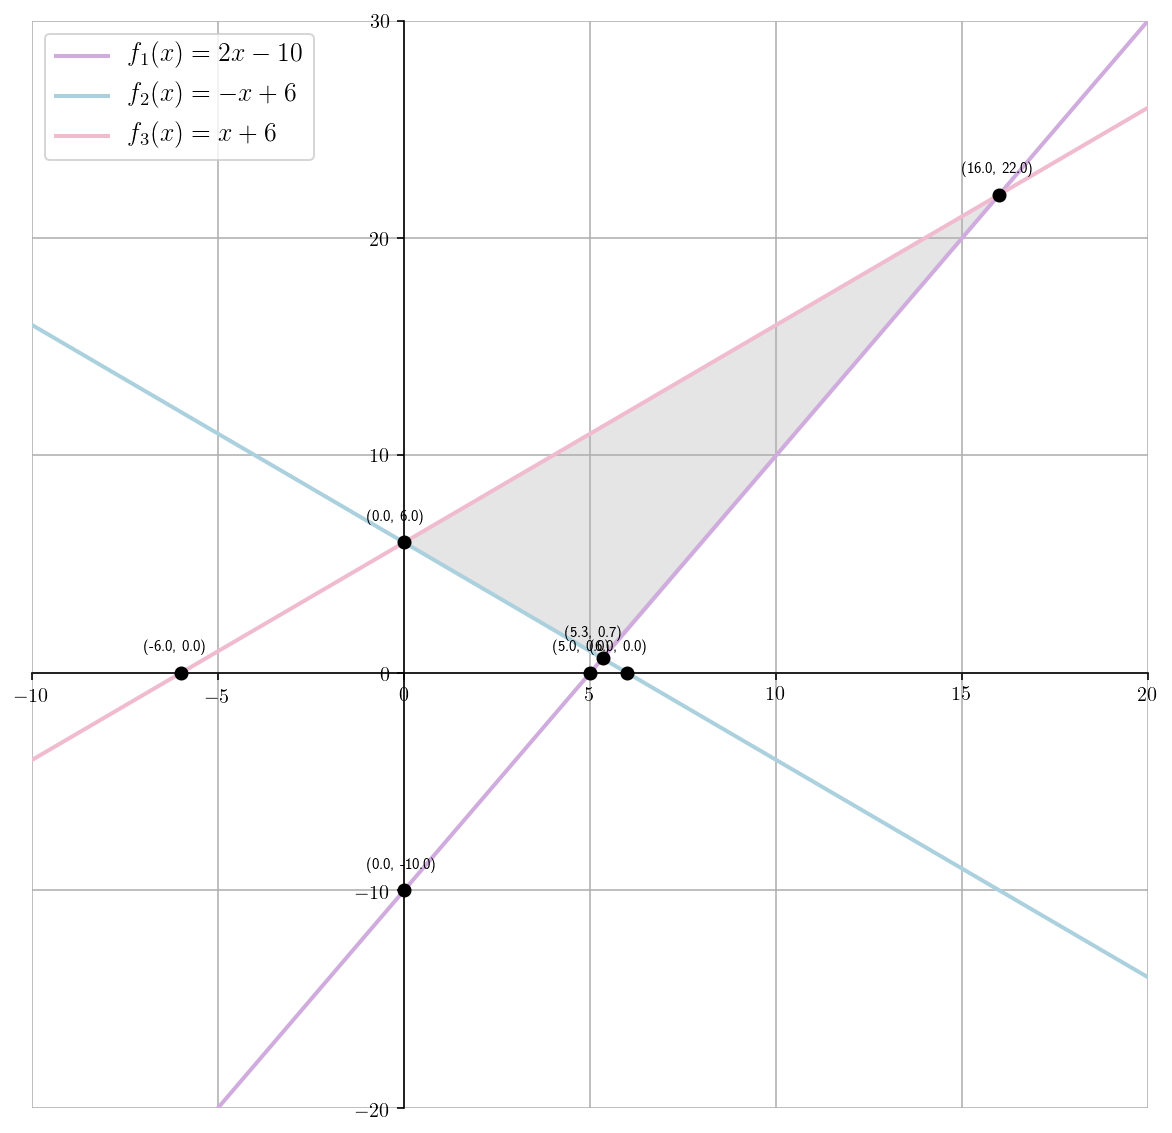

In [5]:
# axes actually translates into what we think of as an individual plot or graph
# rather than the plural of “axis,” as we might expect
fig, ax = plt.subplots(figsize=(10, 10))

# y = m * x + b, then [m, b]
linear_functions = [[2, -10], [-1, 6], [1, 6]]
system_intercepts = get_system_intercepts(linear_functions)
x = config_limits(ax, system_intercepts)

ax.spines['bottom'].set_position(('data',0)) # set position of x spine to x=0
ax.spines['left'].set_position(('data',0))   # set position of y spine to y=0
ax.spines['top'].set_color("none") #turn off
ax.spines['right'].set_color("none") #turn off

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.grid(True)

colors = ['#d0abde', '#abd1de', '#f0bbcf']
labels = ["$f_1(x)=2x-10$", "$f_2(x)=-x+6$", "$f_3(x)=x+6$"]

for i in range(0, len(linear_functions)):
    ax.plot(x, x*linear_functions[i][0]+linear_functions[i][1], colors[i], label=labels[i], linewidth=2);

ax.legend(loc=0, fontsize=13); # upper left corner

for i in range(0, len(system_intercepts)):
    ax.plot(system_intercepts[i][0], system_intercepts[i][1], 'ko')
    ax.annotate('({:.1f}, {:.1f})'.format(system_intercepts[i][0], system_intercepts[i][1]), (system_intercepts[i][0]-1, system_intercepts[i][1]+1), fontsize=7)

# Fill feasible region
x = [0, 5.3, 16]
y = [6, 0.7, 22]
ax.fill(x, y, color='grey', alpha=0.2);

3. **Bonus:** Graph the feasible regions of each of the problems in homework 3.

    $$2𝑦>4x-6$$
    $$x<0$$
    $$y<0$$

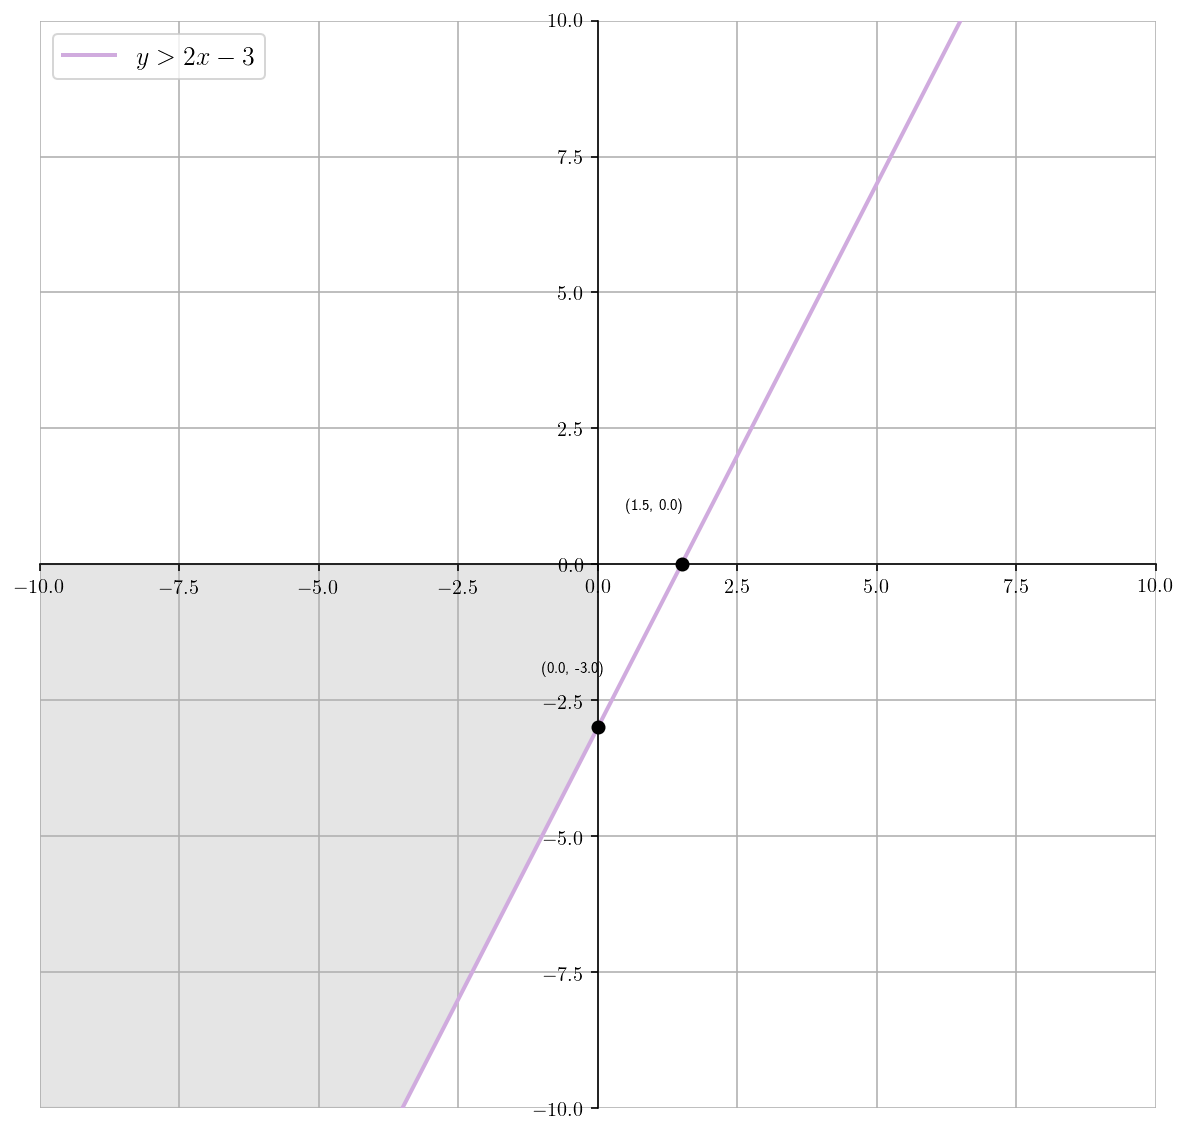

In [6]:
# axes actually translates into what we think of as an individual plot or graph
# rather than the plural of “axis,” as we might expect
fig, ax = plt.subplots(figsize=(10, 10))

# y = m * x + b, then [m, b]
linear_functions = [[2, -3]]
system_intercepts = get_system_intercepts(linear_functions)
x = config_limits(ax, system_intercepts)

ax.spines['bottom'].set_position(('data',0)) # set position of x spine to x=0
ax.spines['left'].set_position(('data',0))   # set position of y spine to y=0
ax.spines['top'].set_color("none") #turn off
ax.spines['right'].set_color("none") #turn off

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.grid(True)

colors = ['#d0abde', '#abd1de', '#f0bbcf']
labels = ["$y>2x-3$"]

for i in range(0, len(linear_functions)):
    ax.plot(x, x*linear_functions[i][0]+linear_functions[i][1], colors[i], label=labels[i], linewidth=2);

ax.legend(loc=0, fontsize=13); # upper left corner

for i in range(0, len(system_intercepts)):
    ax.plot(system_intercepts[i][0], system_intercepts[i][1], 'ko')
    ax.annotate('({:.1f}, {:.1f})'.format(system_intercepts[i][0], system_intercepts[i][1]), (system_intercepts[i][0]-1, system_intercepts[i][1]+1), fontsize=7)

# Fill feasible region
x = [-10, -10, -3.5, 0, 0]
y = [0, -10, -10, -3, 0]
ax.fill(x, y, color='grey', alpha=0.2);

 $$𝑦\leq\frac{1}{2}x+2$$
    $$x<2$$
    $$y>2$$

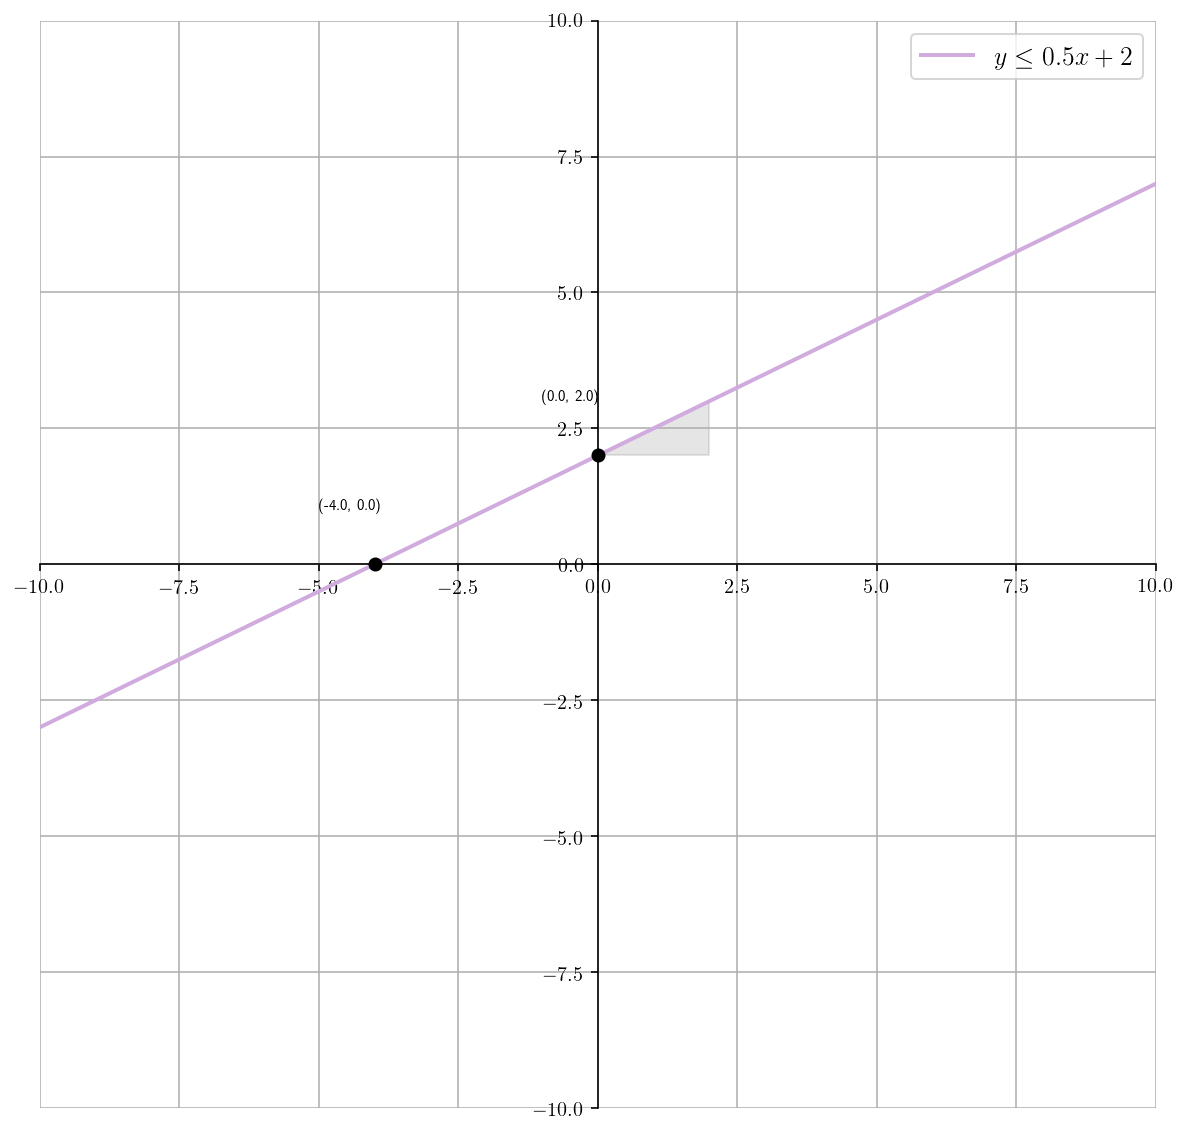

In [36]:
# axes actually translates into what we think of as an individual plot or graph
# rather than the plural of “axis,” as we might expect
fig, ax = plt.subplots(figsize=(10, 10))

# y = m * x + b, then [m, b]
linear_functions = [[0.5, 2]]
system_intercepts = get_system_intercepts(linear_functions)
x = config_limits(ax, system_intercepts)

ax.spines['bottom'].set_position(('data',0)) # set position of x spine to x=0
ax.spines['left'].set_position(('data',0))   # set position of y spine to y=0
ax.spines['top'].set_color("none") #turn off
ax.spines['right'].set_color("none") #turn off

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.grid(True)

colors = ['#d0abde', '#abd1de', '#f0bbcf']
labels = ["$y\leq 0.5x+2$"]

for i in range(0, len(linear_functions)):
    ax.plot(x, x*linear_functions[i][0]+linear_functions[i][1], colors[i], label=labels[i], linewidth=2);

ax.legend(loc=0, fontsize=13); # upper left corner

for i in range(0, len(system_intercepts)):
    ax.plot(system_intercepts[i][0], system_intercepts[i][1], 'ko')
    ax.annotate('({:.1f}, {:.1f})'.format(system_intercepts[i][0], system_intercepts[i][1]), (system_intercepts[i][0]-1, system_intercepts[i][1]+1), fontsize=7)

# Fill feasible region
x = [0,  2, 2]
y = [2, 2, 3]
ax.fill(x, y, color='grey', alpha=0.2);

## References
- https://realpython.com/python-matplotlib-guide/
- https://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb
- https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py
